<a href="https://colab.research.google.com/github/AlbaRuth/DataScienceEcosystem/blob/main/%D0%9C%D0%97%D0%98%D0%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

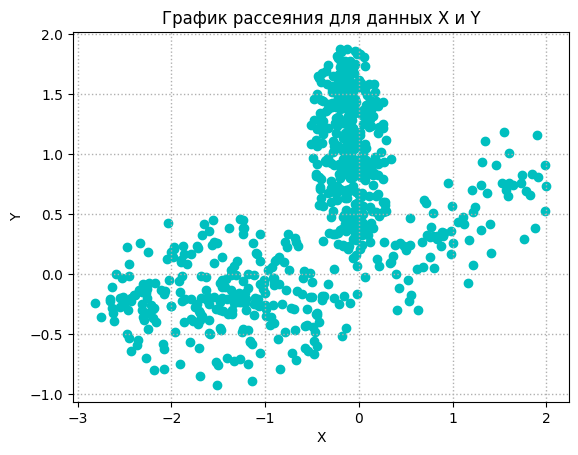

In [37]:
with open('/2023_1.txt', 'r') as file:
    lines = file.readlines()

data = [line.strip().split() for line in lines]
df = pd.DataFrame(data, columns=['X', 'Y'])
df[['X', 'Y']] = df[['X', 'Y']].apply(pd.to_numeric)


df.describe()


# Построение графика рассеяния
plt.scatter(df['X'], df['Y'], c = 'c')

plt.rc('grid', linestyle=':', linewidth= 0.5 )
plt.grid(True)
# Добавление подписей осей
plt.xlabel('X')
plt.ylabel('Y')

# Добавление заголовка
plt.title('График рассеяния для данных X и Y')

# Отображение графика
plt.show()


В этом коде мы используем метод `.diff()` для вычисления разницы между последовательными значениями в столбцах 'X' и 'Y', затем используем формулу евклидова расстояния и `np.sqrt()` для вычисления расстояний. Мы также используем `fillna(0)`, чтобы обработать первую строку, в которой не будет разницы.

Теперь в DataFrame df будет новый столбец 'Distance', содержащий расстояния между точками.







In [40]:
df['Distance'] = np.sqrt((df['X'].diff()**2 + df['Y'].diff()**2).fillna(0))
df.Distance.describe()

count    715.000000
mean       0.732820
std        0.462279
min        0.000000
25%        0.400094
50%        0.628862
75%        0.982054
max        3.031195
Name: Distance, dtype: float64

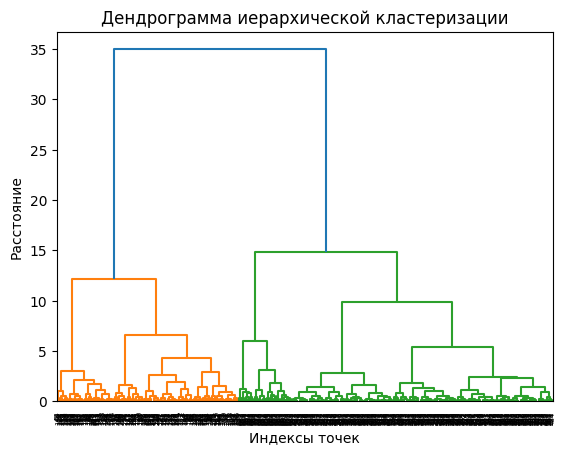

In [41]:
from scipy.cluster.hierarchy import linkage, dendrogram
data = df[['X', 'Y']].to_numpy()

# Вычисление связей между точками (метод ближних соседов)
linkage_matrix = linkage(data, method='ward')


dendrogram(linkage_matrix, labels=range(len(data)), orientation='top')
plt.xlabel('Индексы точек')
plt.ylabel('Расстояние')
plt.title('Дендрограмма иерархической кластеризации')
plt.show()

In [42]:
from scipy.cluster.hierarchy import linkage, dendrogram, cophenet
from scipy.spatial.distance import pdist

# Рассчитываем матрицу попарных расстояний между точками
distance_matrix = pdist(data)

# Рассчитываем кофенетический коэффициент
c, coph_dists = cophenet(linkage_matrix, distance_matrix)


print(f"Кофенетический коэффициент: {c}")

Кофенетический коэффициент: 0.7665720672763116


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


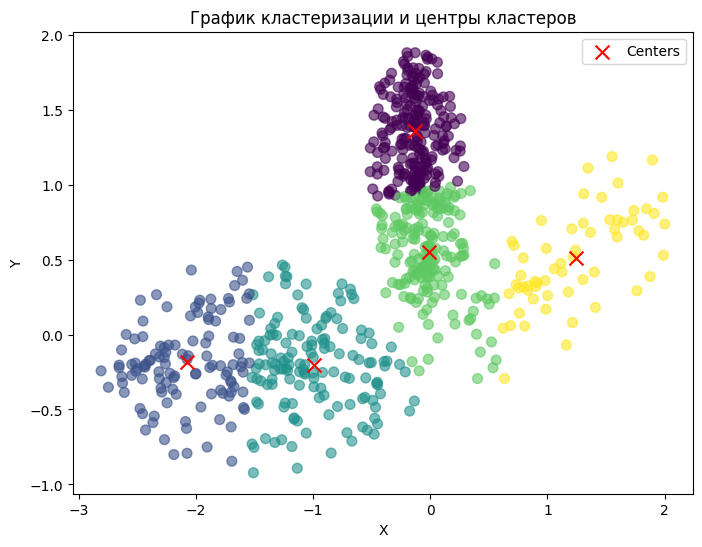

In [53]:
from sklearn.cluster import KMeans

# Предположим, что n_clusters - это желаемое количество кластеров
nn_clusters = 5
kmeans = KMeans(n_clusters=nn_clusters)
kmeans.fit(df[['X', 'Y']])

# Центры кластеров
cluster_centers = kmeans.cluster_centers_

# Внутрикластерная дисперсия
inertia = kmeans.inertia_

# Геометрические расстояния от элементов до центров кластеров
distances_to_centers = kmeans.transform(df[['X', 'Y']])

from scipy.spatial.distance import pdist, squareform

cluster_distances = squareform(pdist(cluster_centers))

plt.figure(figsize=(8, 6))
plt.scatter(df['X'], df['Y'], c=kmeans.labels_, cmap='viridis', alpha=0.6, s=50)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=100, label='Centers')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('График кластеризации и центры кластеров')
plt.show()


# Новый раздел